In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [44]:
df = pd.read_csv('train.csv')
df.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,...,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,...,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,4,234,7,573,222,230,144,...,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,9,240,56,666,223,221,133,...,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,10,247,11,636,228,219,124,...,0,0,0,0,0,0,0,0,0,5


In [45]:
df.shape

(15120, 56)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [47]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [48]:
df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [49]:
df['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [50]:
x = df.drop(columns=['Cover_Type'],axis=1)
y = df['Cover_Type']

In [51]:
x.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [52]:
y

0        5
1        5
2        2
3        2
4        5
        ..
15115    3
15116    3
15117    3
15118    3
15119    3
Name: Cover_Type, Length: 15120, dtype: int64

In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=40 )

In [54]:
xtrain

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
12989,12990,2189,80,10,0,0,618,234,223,120,...,0,0,0,0,0,0,0,0,0,0
8160,8161,3342,157,9,1099,149,2642,230,242,143,...,0,0,0,0,0,0,0,1,0,0
3490,3491,2895,183,14,85,11,247,223,249,155,...,0,0,1,0,0,0,0,0,0,0
13275,13276,2278,341,9,0,0,1537,201,226,165,...,0,0,0,0,0,0,0,0,0,0
1414,1415,2847,50,27,323,199,335,220,172,70,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11256,11257,2444,49,22,124,2,886,223,188,89,...,0,0,0,0,0,0,0,0,0,0
14501,14502,3454,326,10,499,35,5016,195,229,173,...,0,0,0,0,0,0,0,1,0,0
14343,14344,3381,172,16,301,69,1639,229,246,144,...,0,0,0,0,0,0,0,1,0,0
14555,14556,3181,359,9,124,-4,1410,206,223,155,...,0,1,0,0,0,0,0,0,0,0


In [55]:
xtest

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
5197,5198,3275,61,7,30,0,3814,226,225,133,...,0,0,0,0,0,0,0,1,0,0
4907,4908,2218,3,29,127,55,811,168,172,131,...,0,0,0,0,0,0,0,0,0,0
10893,10894,2728,175,10,350,89,2618,226,246,151,...,0,0,0,0,0,0,0,0,0,0
10883,10884,2633,142,16,120,41,1458,241,235,118,...,0,0,0,0,0,0,0,0,0,0
15035,15036,2601,35,15,212,0,1578,217,206,121,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,3054,2183,100,32,180,132,484,252,178,27,...,0,0,0,0,0,0,0,0,0,0
6429,6430,2406,41,21,67,31,470,217,190,99,...,0,0,0,0,0,0,0,0,0,0
11695,11696,2795,37,5,190,2,1153,220,229,145,...,0,0,0,0,0,0,0,0,0,0
8915,8916,2974,7,28,242,69,1956,174,172,124,...,0,0,1,0,0,0,0,0,0,0


In [56]:
ytrain

12989    4
8160     7
3490     5
13275    4
1414     2
        ..
11256    6
14501    7
14343    1
14555    2
11590    2
Name: Cover_Type, Length: 12096, dtype: int64

In [59]:
x = df.drop(columns=['Cover_Type'], axis=1)
y = df['Cover_Type'] -1

In [60]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
xgb_model = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(xtrain, ytrain)

C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:38:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [62]:
pred_xgb = xgb_model.predict(xtest)
acc_xgb = accuracy_score(ytest, pred_xgb)
print("XGBoost Test Accuracy:", acc_xgb)

XGBoost Test Accuracy: 0.8713624338624338


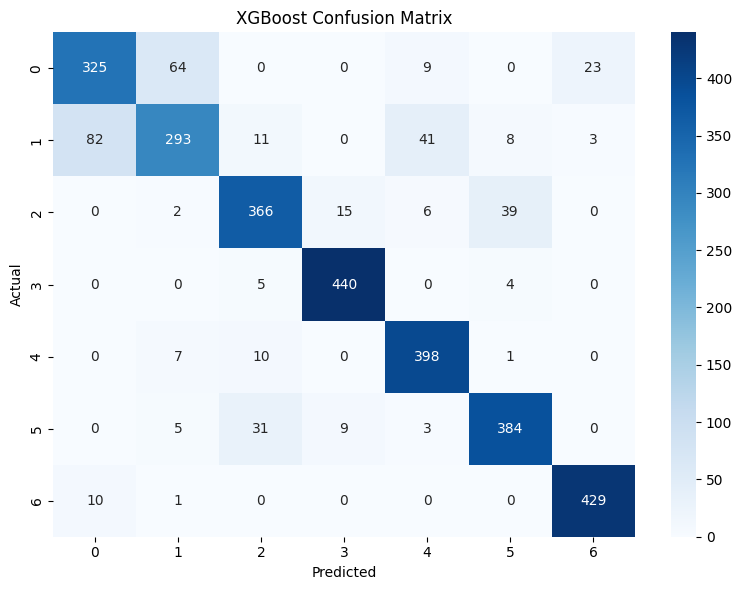

In [63]:
cm = confusion_matrix(ytest, pred_xgb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [64]:
model = RandomForestClassifier(n_estimators=100,max_depth=20,random_state=42)
model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=20, random_state=42)

In [65]:
pred = model.predict(xtest)

In [66]:
pred

array([5, 5, 0, ..., 4, 3, 3])

In [67]:
print('trainning accuracy :',model.score(xtrain,ytrain))
print('testing accuracy :',model.score(xtest,ytest))

trainning accuracy : 0.9985119047619048
testing accuracy : 0.875


In [72]:
acc = model.score(xtest,ytest)

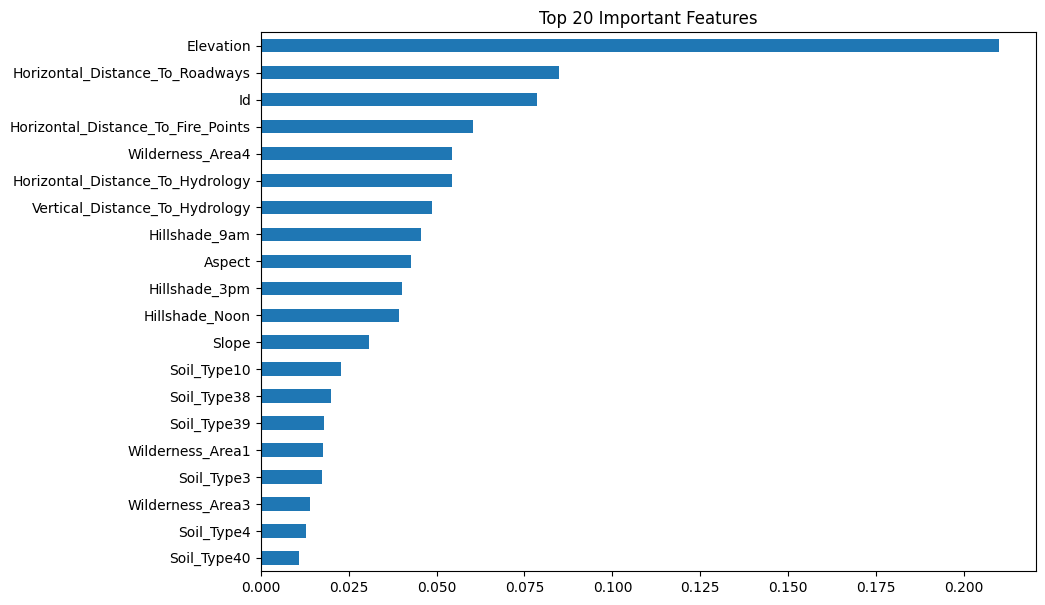

In [68]:
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
top_features = feature_importances.nlargest(20)
top_features.plot(kind='barh', figsize=(10, 7), title="Top 20 Important Features")
plt.gca().invert_yaxis()
plt.show()

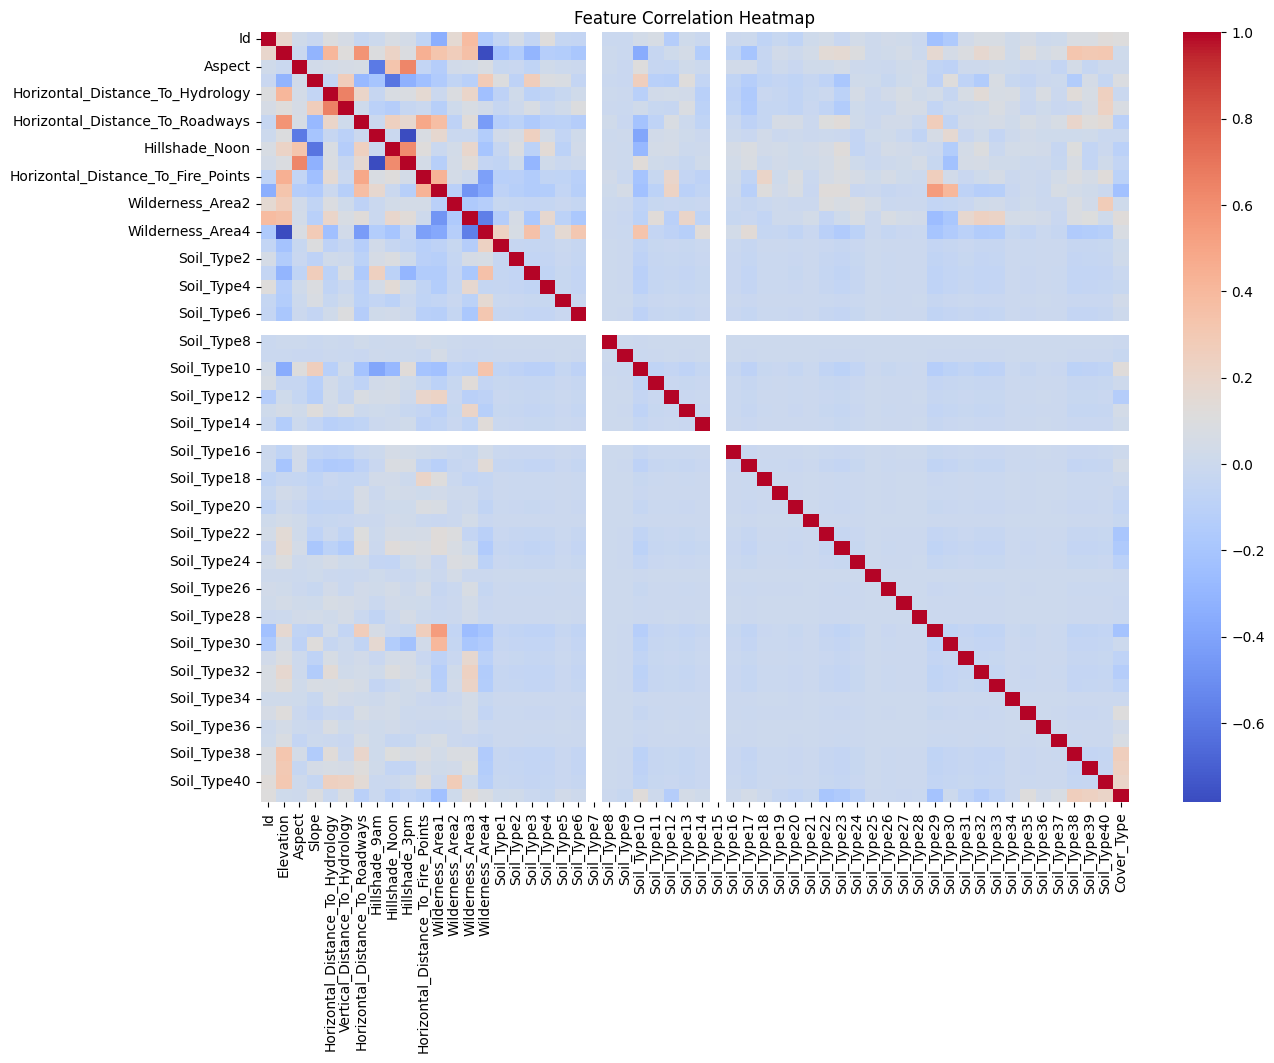

In [69]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

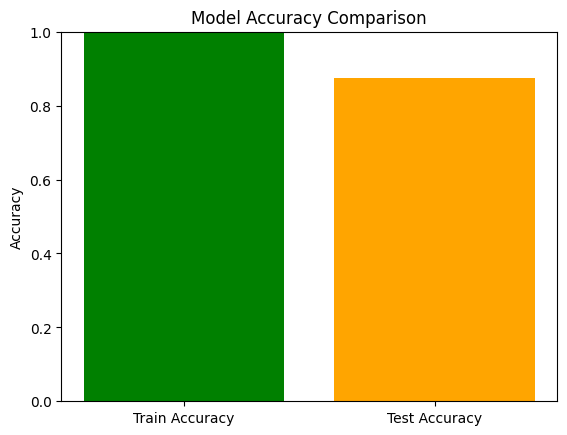

In [70]:
train_acc = model.score(xtrain, ytrain)
test_acc = model.score(xtest, ytest)

plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['green', 'orange'])
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

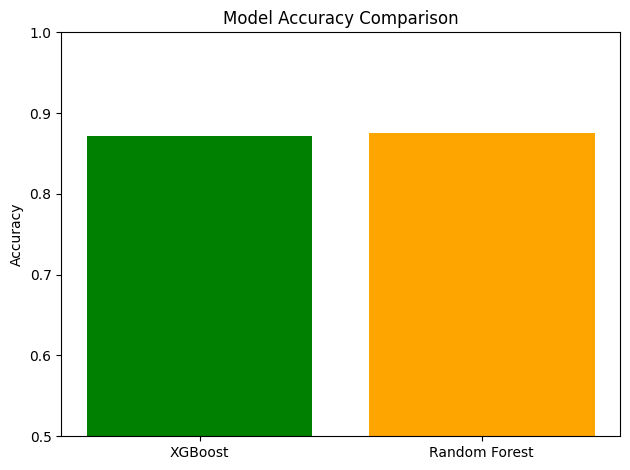

In [73]:
plt.bar(['XGBoost', 'Random Forest'], [acc_xgb, acc], color=['green', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [76]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_model, x, y, cv=skf)
print("Stratified K-Fold CV Scores:", scores)
print("Mean CV Score:", scores.mean())

print("MAE:", mean_absolute_error(ytest, pred_xgb))
print("MSE:", mean_squared_error(ytest, pred_xgb))

C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:40:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:40:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:40:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:40:58] WARNING: C:\actio

Stratified K-Fold CV Scores: [0.86011905 0.87136243 0.86772487 0.85780423 0.85482804]
Mean CV Score: 0.8623677248677246
MAE: 0.29794973544973546
MSE: 0.9923941798941799
